In [12]:
from modules import constants as cnst
from modules import analytic_sed as analytic_sed
import sympy as sp
from scipy.integrate import quad
#%pylab notebook
%pylab notebook
from scipy.integrate import fixed_quad



Populating the interactive namespace from numpy and matplotlib


In [7]:
k=cnst.boltzman_const
h=cnst.planck_const
ghz2hz=cnst.ghz2hz
T=10. ; slope=1.
c_nu0=k*T/h/ghz2hz ; c_c0=h*ghz2hz/k
x=linspace(15.,3000.,200) ; xmin=min(x) ; xmax=max(x)

In [57]:
ana_sed=analytic_sed.analytic_sed()
ana_sed.create_fn_dir(5)

In [58]:
def return_vector_dir():
    fn_dir={}
    cnt=0
    for i in xrange(len(ana_sed.fn_dir)): 
        fn_dir[i]=(lambda nu, cnt=i : ana_sed.fn_dir[cnt](nu, 1./T,slope,c_nu0,c_c0))
        cnt=cnt+1
    return fn_dir

dirfn=return_vector_dir()


<IPython.core.display.Javascript object>


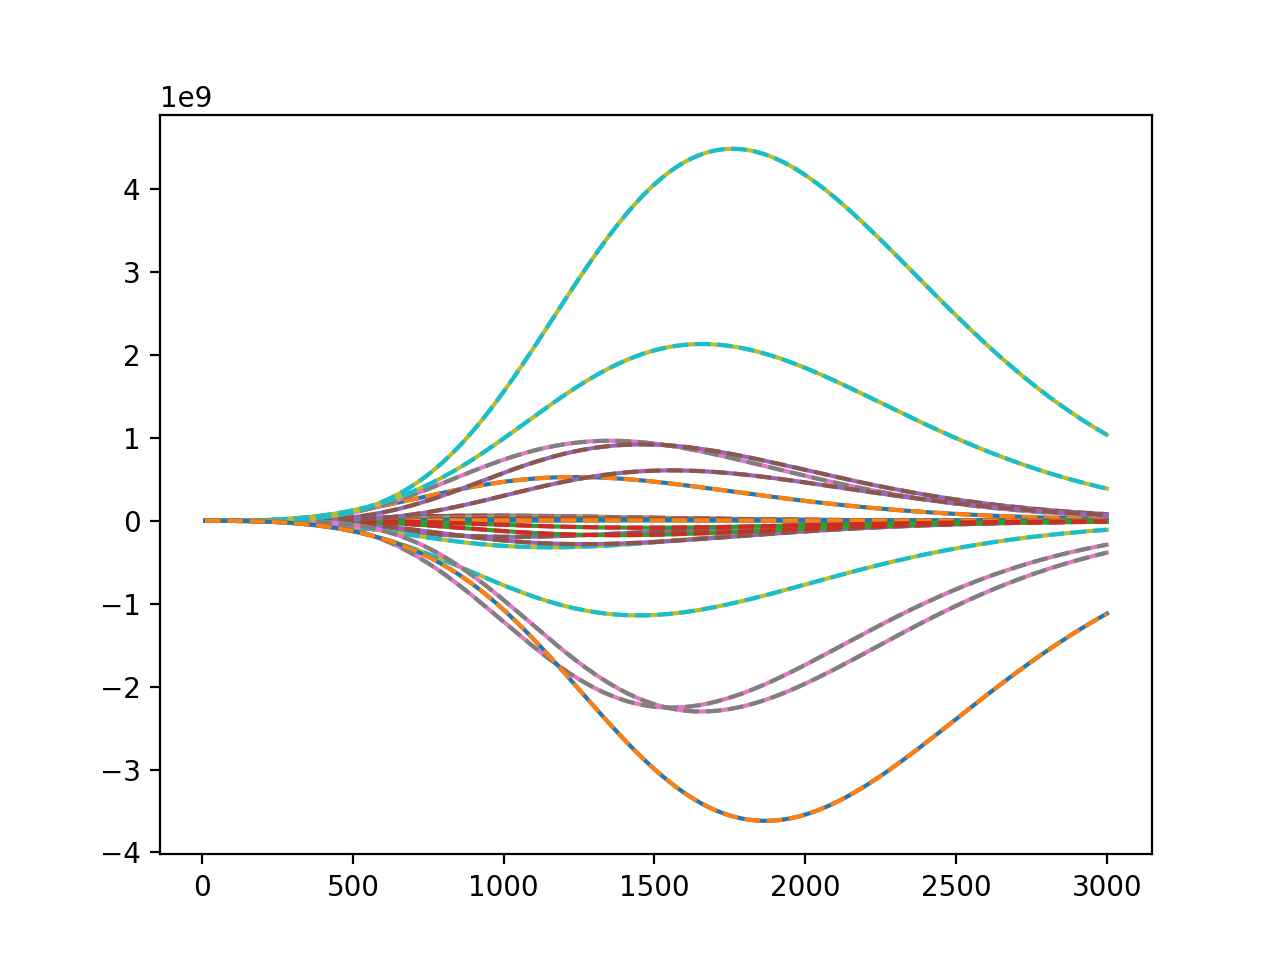

In [61]:
figure()
x=linspace(10.,3000.,200)
for i in range(len(dirfn)):
    plot(x,(lambda x: ana_sed.fn_dir[i](x,1./T,slope,c_nu0,c_c0))(x),"-")
    plot(x,dirfn[i](x),"--")

In [70]:
# Here we only compute basis vectors, the vectors which are really tiny are ignored.
def dot_prod(v1,v2,xmin,xmax):
    return fixed_quad(lambda x: v1(x)*v2(x),xmin,xmax,n=50)[0]

def get_gs_basis(v_dir,xmin,xmax):
    fn_basis={}
    cnt=0
    norm0=1.
    for i in range(len(v_dir)):    
        print "i=",i
        bdotv=[]
        for j in range(len(fn_basis)):
            bdotv=append(bdotv,dot_prod(v_dir[i],fn_basis[j],xmin,xmax))
        temp_fn=(lambda x,coeff=bdotv,wb=len(fn_basis),vec=i: v_dir[vec](x) - sum(coeff[k]*fn_basis[k](x) for k in xrange(wb)))
        norm=dot_prod(temp_fn,temp_fn,xmin,xmax) ; print "Pre normalization",sqrt(norm)
        if cnt==0:
            norm0=norm
        if norm>=norm0*1e-8:
            fn_basis[cnt]=(lambda x,const=norm,coeff=bdotv,wb=len(fn_basis),vec=i: (v_dir[vec](x) - sum(coeff[k]*fn_basis[k](x) for k in xrange(wb)))/sqrt(const))
            cnt=cnt+1
    return fn_basis

fn_basis=get_gs_basis(dirfn,xmin,xmax) 
fn_basis=get_gs_basis(fn_basis,xmin,xmax) 
fn_basis=get_gs_basis(fn_basis,xmin,xmax) 

i= 0
Pre normalization 1192698091.08
i= 1
Pre normalization 428273057.994
i= 2
Pre normalization 478909048.408
i= 3
Pre normalization 23491806.4027
i= 4
Pre normalization 36098577.8515
i= 5
Pre normalization 72552661.716
i= 6
Pre normalization 800438.581082
i= 7
Pre normalization 893335.765555
i= 8
Pre normalization 1235814.61811
i= 9
Pre normalization 1662293.10783
i= 10
Pre normalization 48311.6524068
i= 11
Pre normalization 15048.5136354
i= 12
Pre normalization 183276.46705
i= 13
Pre normalization 551581.524144
i= 14
Pre normalization 14636520.0253
i= 15
Pre normalization 52446.2207028
i= 16
Pre normalization 41778.1785967
i= 17
Pre normalization 127018.582441
i= 18
Pre normalization 17253353.449
i= 19
Pre normalization 249487085.875
i= 20
Pre normalization 769481632.555
i= 0
Pre normalization 1.0
i= 1
Pre normalization 1.0
i= 2
Pre normalization 1.0
i= 3
Pre normalization 1.0
i= 4
Pre normalization 1.0
i= 5
Pre normalization 1.0
i= 6
Pre normalization 1.0
i= 7
Pre normalization 1.0

<IPython.core.display.Javascript object>


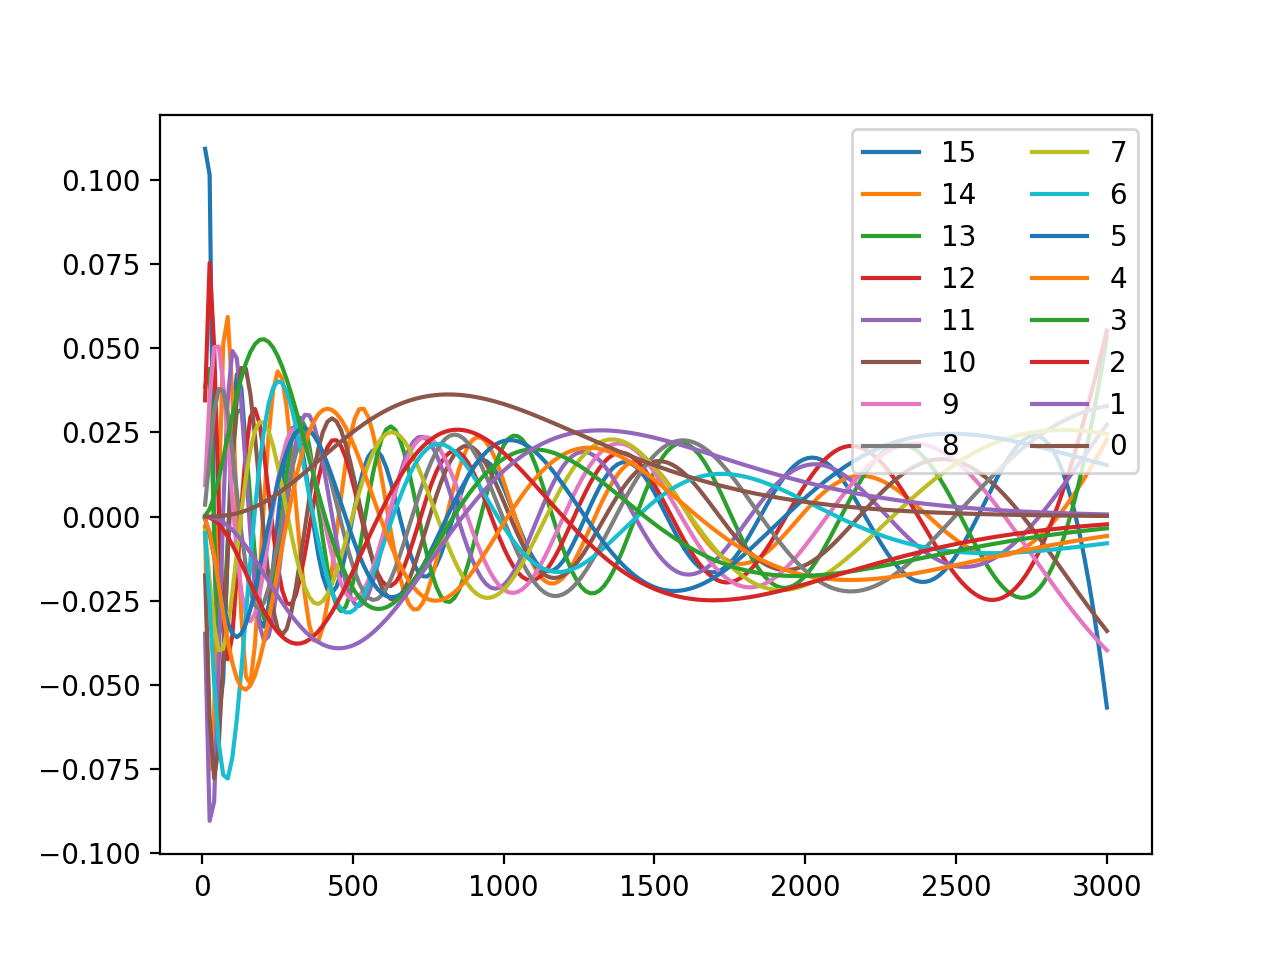

In [63]:
figure()
for i in range(len(fn_basis))[::-1]:
    plot(x,fn_basis[i](x),label=str(i))
legend(loc=0,ncol=2)
#semilogx()

In [65]:
cov=zeros((len(fn_basis),len(fn_basis)),float)

for i in xrange(len(fn_basis)):
    print i
    for j in xrange(i+1):
        cov[i,j]=dot_prod(fn_basis[i],fn_basis[j],xmin,xmax)
        cov[j,i]=cov[i,j]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


<IPython.core.display.Javascript object>


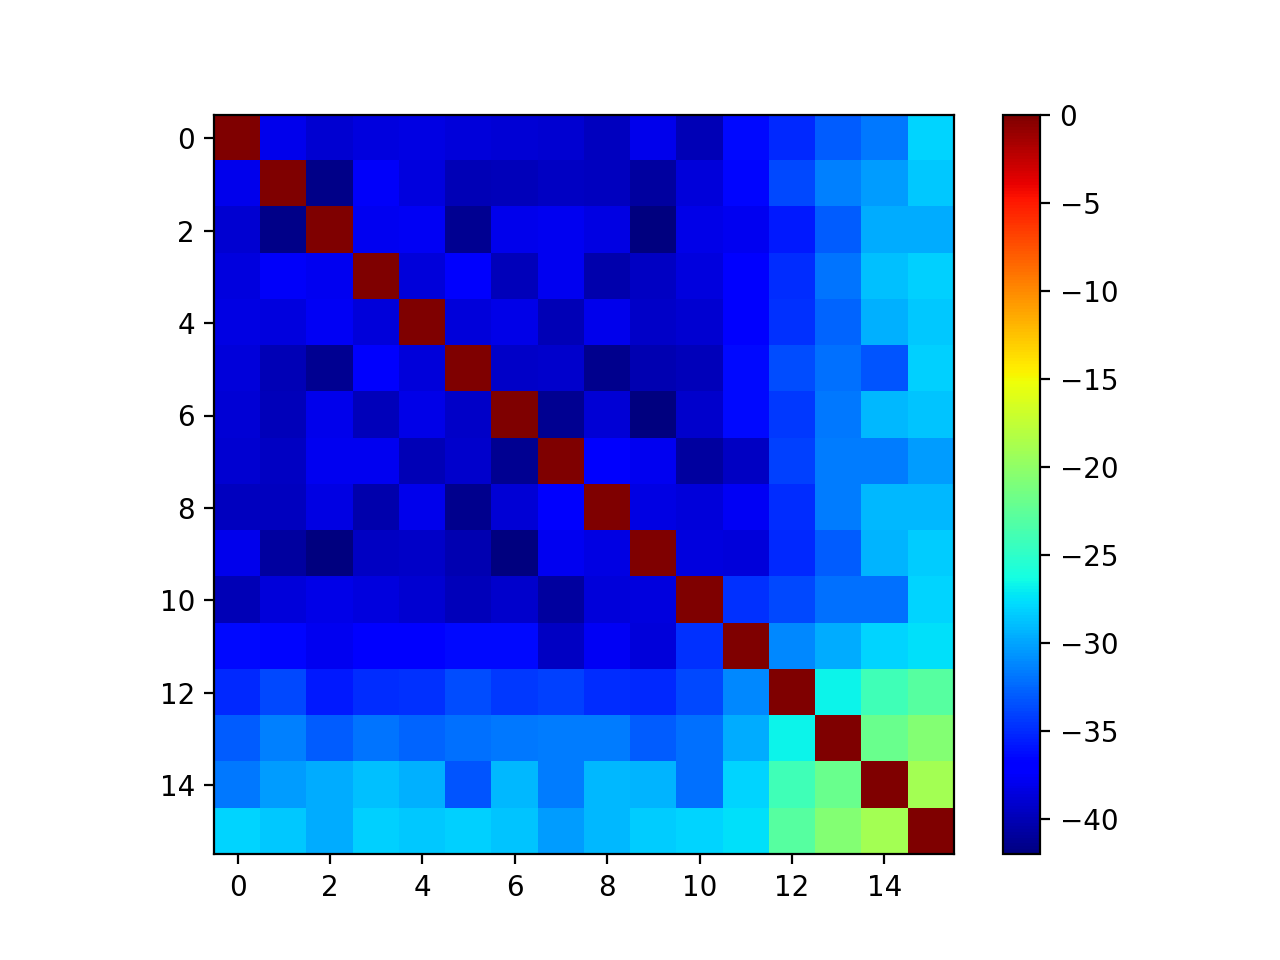

In [66]:
figure()
imshow(log(abs(cov)))
colorbar()